In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame

from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d 
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## 1. Random Noise Gaussian

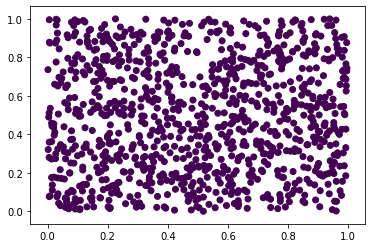

In [43]:
no_structure = np.random.rand(1000, 2)
labels_gauss = [0]*1000
plt.scatter(no_structure[:,0], no_structure[:,1], c=labels_gauss)

## 2. Non Spherical Data


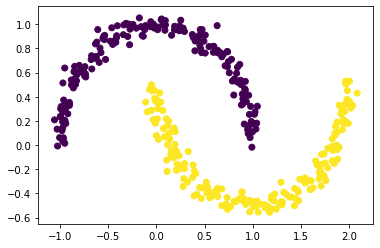

In [42]:
from sklearn.datasets import make_moons
X_MOON, labels_MOON = make_moons(375, noise=.05, random_state=0)
plt.scatter(X_MOON[:,0], X_MOON[:,1], c=labels_MOON)
plt.show()

## 3. Many Clusters Close

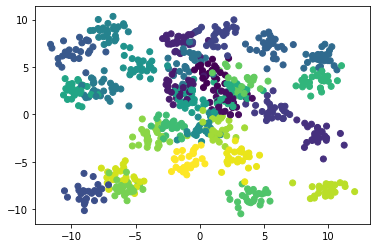

In [47]:
from sklearn.datasets import make_blobs
X_close, labels_close = make_blobs(centers=30, n_samples=800, random_state=0, cluster_std=0.85)

plt.scatter(X_close[:,0], X_close[:,1], c=labels_close)
plt.show()

## 4. Different Cluster Sizes

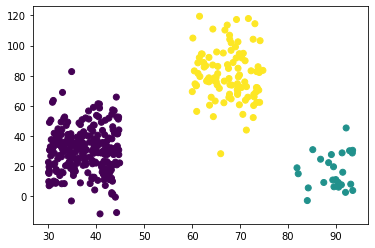

In [41]:
center1 = (30, 30)
center2 = (80, 20)
center3= (60,80)
distance = 15


x1 = np.random.uniform(center1[0], center1[0] + distance, size=(250,))
y1 = np.random.normal(center1[1], distance, size=(250,)) 
label1 = [1]*250

x2 = np.random.uniform(center2[0], center2[0] + distance, size=(25,))
y2 = np.random.normal(center2[1], distance, size=(25,)) 
label2 = [2]*25

x3 = np.random.uniform(center3[0], center3[0] + distance, size=(100,))
y3 = np.random.normal(center3[1], distance, size=(100,)) 
label3 = [3] *100

labels_size = np.append(label1, np.append(label2, label3))

x_size = np.append(x1,np.append(x2,x3))
y_size = np.append(y1,np.append(y2,y3))
plt.scatter(x_size, y_size, c=labels_size)
plt.show()


## 5. Different Cluster Densities

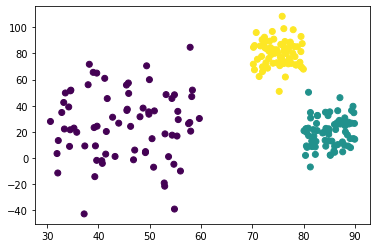

In [45]:
center1 = (30, 30)
center2 = (80, 20)
center3 = (70,80)
distance = 10
distance1 = 30

x1 = np.random.uniform(center1[0], center1[0] + distance1, size=(75,))
y1 = np.random.normal(center1[1], distance1, size=(75,)) 
label1 = [1]*75

x2 = np.random.uniform(center2[0], center2[0] + distance, size=(75,))
y2 = np.random.normal(center2[1], distance, size=(75,)) 
label2 = [2]*75

x3 = np.random.uniform(center3[0], center3[0] + distance, size=(75,))
y3 = np.random.normal(center3[1], distance, size=(75,)) 
label3 = [3]*75

labels_dense = np.append(label1, np.append(label2, label3))


x_dense = np.append(x1,np.append(x2,x3))
y_dense = np.append(y1,np.append(y2,y3))
plt.scatter(x_dense, y_dense, c=labels_dense)
plt.show()

## 6. New dataset

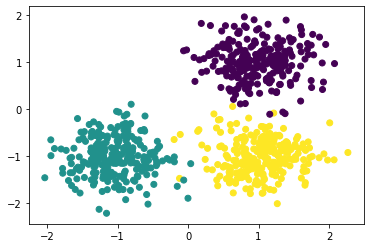

In [46]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_new, labels_new = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
plt.scatter(X_new[:,0], X_new[:,1], c=labels_new)
plt.show()

## Initial clustering with kmeans (k=3)

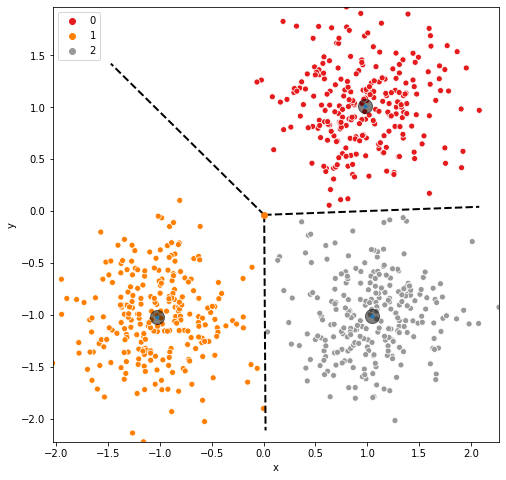

In [62]:
df_new = DataFrame(X_new,columns=['x','y'])

fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=3).fit(df_new)
ax = sns.scatterplot(x=df_new['x'], y=df_new['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_new) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 
min_x,max_x = min(df_new['x']),max(df_new['x'])  
min_y,max_y = min(df_new['y']),max(df_new['y'])  
plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show() 

### Re-scale x dimension and cluster with k-means (k=3)

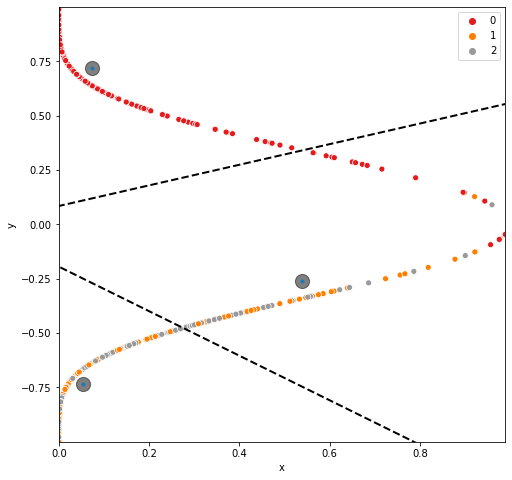

In [97]:
#normalizing x dimension
#tmp_x = df_new.x - df_new.x.min()
#scaled_x = tmp_x / tmp_x.max()
scaled_x = np.power(df_new.x,10)
#print(scaled_x)
df_new_rescalled = DataFrame(scaled_x,columns=['x'])
df_new_rescalled['y'] = df_new[['y']]

fig, ax = plt.subplots(figsize=(8,8))
kmeans_noise = KMeans(n_clusters=3).fit(df_new_rescalled)
#ax = sns.scatterplot(x=df_new_rescalled['x'], y=df_new_rescalled['y'], hue=kmeans_noise.labels_.astype(int),  palette="Set1",ax=ax)
ax = sns.scatterplot(x=df_new_rescalled['x'], y=df_new_rescalled['y'], hue=labels_new,  palette="Set1",ax=ax)
y_kmeans = kmeans_noise.predict(df_new_rescalled) # cluster index for each observation 
centers = kmeans_noise.cluster_centers_ # cluster center coordinates 
vor = Voronoi(centers) 
voronoi_plot_2d(vor,ax=ax,line_width=2) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 
min_x,max_x = min(df_new_rescalled['x']),max(df_new_rescalled['x'])  
min_y,max_y = min(df_new_rescalled['y']),max(df_new_rescalled['y'])  
plt.xlim(min_x,max_x)
plt.ylim(min_y,max_y)
plt.show()

In [0]:
#Preassembly
df_noise     = DataFrame(no_structure,columns=['x','y'])
df_spherical = DataFrame(X_MOON,columns=['x','y'])
df_manyclose = DataFrame(X_close,columns=['x','y'])
data_size = {'x': x_size, 'y': y_size}
df_sizediff  = DataFrame(data_size,columns=['x','y'])
data_dense = {'x': x_dense, 'y': y_dense}
df_densediff = DataFrame(data_dense,columns=['x','y'])
df_new = DataFrame(X_new,columns=['x','y'])

# Unsupervised Learning: Density Based Clustering


## 1. Random Noise Gaussian

### Determine best eps for min_samples=4

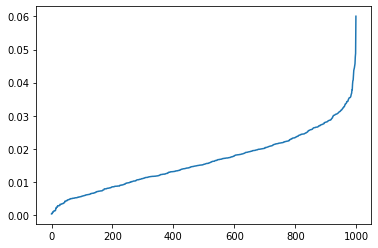

In [113]:
neigh = NearestNeighbors(n_neighbors=4, metric='euclidean' )
nbrs = neigh.fit(df_noise)
distances, indices = nbrs.kneighbors(df_noise)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Euclidian metric with no scaling

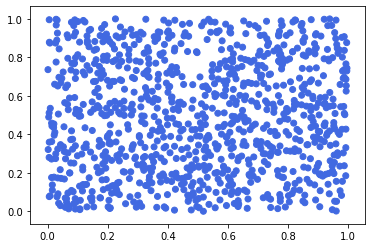

In [438]:
m_noise = DBSCAN(eps=0.2, min_samples=4, metric='euclidean')
m_noise.fit(df_noise)
labels_pred = m_noise.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_noise["x"], df_noise["y"], c=vectorizer(labels_pred))

### Eiclidian metric with scaled data

In [0]:
scaler = MinMaxScaler()
scaler.fit(df_noise)
tmp = scaler.transform(df_noise)
df_rescalled = DataFrame(tmp, columns=['x','y'])

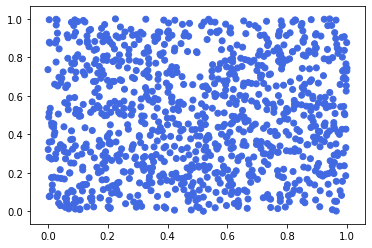

In [279]:
m_rescalled = DBSCAN(eps=0.2, min_samples=4)
m_rescalled.fit(df_rescalled)
labels_pred = m_rescalled.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_rescalled["x"], df_rescalled["y"], c=vectorizer(labels_pred))

In [280]:
metrics.homogeneity_score(labels_gauss, labels_pred)

1.0

### Hamming metric with no scalling

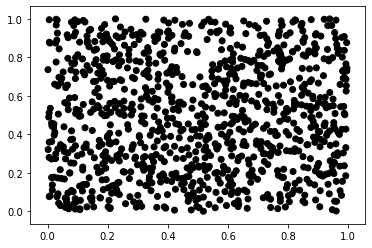

In [480]:
m_noise = DBSCAN(eps=0.2, min_samples=4, metric='hamming')
m_noise.fit(df_noise)
labels_pred = m_noise.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_noise["x"], df_noise["y"], c=vectorizer(labels_pred))

### Hamming metric with scaled data



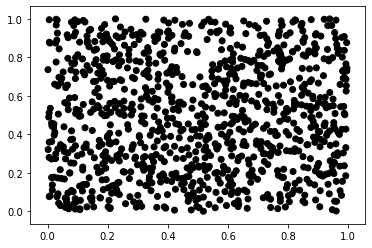

In [0]:
m_noise = DBSCAN(eps=0.2, min_samples=4, metric='hamming')
m_noise.fit(df_noise)
labels_pred = m_noise.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_noise["x"], df_noise["y"], c=vectorizer(labels_pred))

### Correlation metric with no scalling

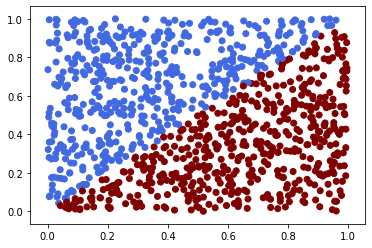

In [295]:
m_noise = DBSCAN(eps=0.2, min_samples=4, metric='correlation')
m_noise.fit(df_noise)
labels_pred = m_noise.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_noise["x"], df_noise["y"], c=vectorizer(labels_pred))

## 2. Non Spherical Data


### Determine best eps for min_samples=4

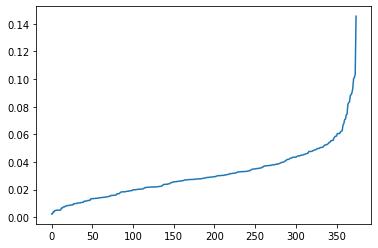

In [124]:
neigh = NearestNeighbors(n_neighbors=4, metric='euclidean' )
nbrs = neigh.fit(df_spherical)
distances, indices = nbrs.kneighbors(df_spherical)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Euclidian metric with no scaling

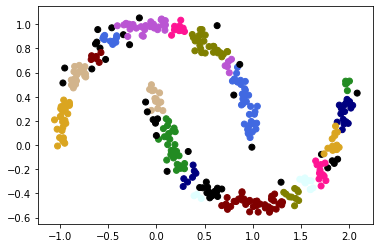

In [473]:
m_spherical = DBSCAN(eps=0.07, min_samples=4)
m_spherical.fit(df_spherical)
labels_pred = m_spherical.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_spherical["x"], df_spherical["y"], c=vectorizer(labels_pred))

In [474]:
print('Adjusted Rand score:',metrics.adjusted_rand_score(labels_MOON, labels_pred))
print('Silhouette score:',metrics.silhouette_score(df_spherical, labels_pred, metric='euclidean'))
print('Homogenityscore:',metrics.homogeneity_score(labels_MOON, labels_pred))

Adjusted Rand score: 0.11009860412781143
Silhouette score: 0.2868843899020429
Homogenityscore: 0.925607984939177


### Eiclidian metric with scaled data

In [0]:
scaler = MinMaxScaler()
scaler.fit(df_spherical)
tmp = scaler.transform(df_spherical)
df_rescalled = DataFrame(tmp, columns=['x','y'])

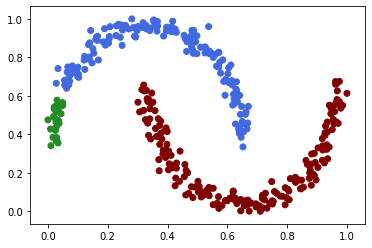

In [476]:
m_rescalled = DBSCAN(eps=0.07, min_samples=4)
m_rescalled.fit(df_rescalled)
labels_pred = m_rescalled.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_rescalled["x"], df_rescalled["y"], c=vectorizer(labels_pred))

In [478]:
print('Rand score:',metrics.adjusted_rand_score(labels_MOON, labels_pred))
print('Silhouette score:',metrics.silhouette_score(df_rescalled, labels_pred, metric='euclidean'))
print('Homogenityscore:',metrics.homogeneity_score(labels_MOON, labels_pred))

Rand score: 0.8805743205460554
Silhouette score: 0.3294740379812647
Homogenityscore: 1.0000000000000002


### Hamming metric with no scaling

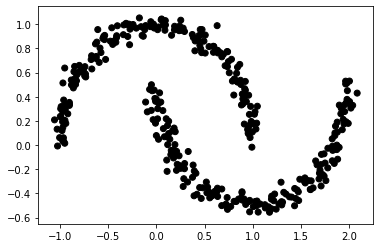

In [467]:
m_spherical = DBSCAN(eps=0.07, min_samples=4, metric='hamming')
m_spherical.fit(df_spherical)
clusters = m_spherical.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_spherical["x"], df_spherical["y"], c=vectorizer(clusters))

In [459]:
print('Rand score:',metrics.adjusted_rand_score(labels_MOON, labels_pred))
print('Silhouette score:',metrics.silhouette_score(df_spherical, labels_pred, metric='euclidean'))
print('Homogenityscore:',metrics.homogeneity_score(labels_MOON, labels_pred))

Rand score: 0.9946950743974935
Silhouette score: 0.07995856380641923
Homogenityscore: 1.0000000000000007


### Correlation metric with no scaling

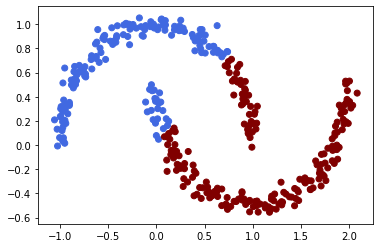

In [468]:
m_spherical = DBSCAN(eps=0.07, min_samples=4, metric='correlation')
m_spherical.fit(df_spherical)
clusters = m_spherical.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_spherical["x"], df_spherical["y"], c=vectorizer(clusters))

In [461]:
print('Rand score:',metrics.adjusted_rand_score(labels_MOON, labels_pred))
print('Silhouette score:',metrics.silhouette_score(df_spherical, labels_pred, metric='euclidean'))
print('Homogenityscore:',metrics.homogeneity_score(labels_MOON, labels_pred))

Rand score: 0.9946950743974935
Silhouette score: 0.07995856380641923
Homogenityscore: 1.0000000000000007


## 3. Many Clusters Close

### Determine best eps for min_samples=4

In [132]:
neigh = NearestNeighbors(n_neighbors=4, metric='euclidean' )
nbrs = neigh.fit(df_manyclose)
distances, indices = nbrs.kneighbors(df_manyclose)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Euclidian metric with no scaling

In [484]:
m_manyclose = DBSCAN(eps=0.55, min_samples=4)
m_manyclose.fit(df_manyclose)
labels_pred = m_manyclose.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_manyclose["x"], df_manyclose["y"], c=vectorizer(labels_pred))

In [485]:
print('Adjusted Rand score:',metrics.adjusted_rand_score(labels_close, labels_pred))
print('Silhouette score:',metrics.silhouette_score(df_manyclose, labels_pred, metric='euclidean'))
print('Homogenityscore:',metrics.homogeneity_score(labels_close, labels_pred))

Adjusted Rand score: 0.3045181196529254
Silhouette score: 0.10225708946971947
Homogenityscore: 0.6611917173423831


### Eiclidian metric with scaled data

In [0]:
scaler = MinMaxScaler()
scaler.fit(df_manyclose)
tmp = scaler.transform(df_manyclose)
df_rescalled = DataFrame(tmp, columns=['x','y'])

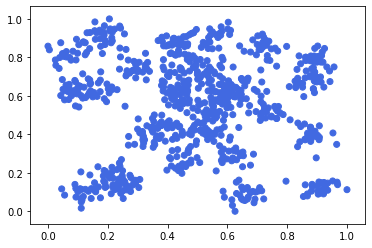

In [487]:
m_rescalled = DBSCAN(eps=0.55, min_samples=4)
m_rescalled.fit(df_rescalled)
labels_pred = m_rescalled.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_rescalled["x"], df_rescalled["y"], c=vectorizer(labels_pred))

In [489]:
print('Adjusted Rand score:',metrics.adjusted_rand_score(labels_close, labels_pred))
#print('Silhouette score:',metrics.silhouette_score(df_rescalled, labels_pred, metric='euclidean'))
print('Homogenityscore:',metrics.homogeneity_score(labels_close, labels_pred))

Adjusted Rand score: 0.0
Homogenityscore: -2.0402267978484994e-16


### Hamming metric with no scaling

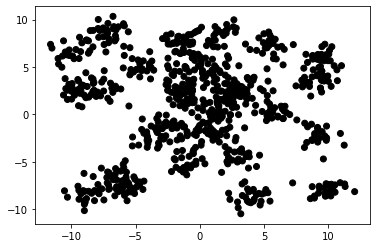

In [298]:
m_manyclose = DBSCAN(eps=0.55, min_samples=4, metric='hamming')
m_manyclose.fit(df_manyclose)
clusters = m_manyclose.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_manyclose["x"], df_manyclose["y"], c=vectorizer(clusters))

### Correlation metric with no scaling

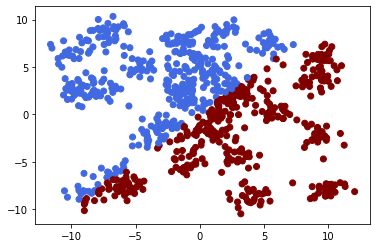

In [299]:
m_manyclose = DBSCAN(eps=0.55, min_samples=4, metric='correlation')
m_manyclose.fit(df_manyclose)
clusters = m_manyclose.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_manyclose["x"], df_manyclose["y"], c=vectorizer(clusters))

## 4. Different Cluster Sizes

### Determine best eps for min_samples=4

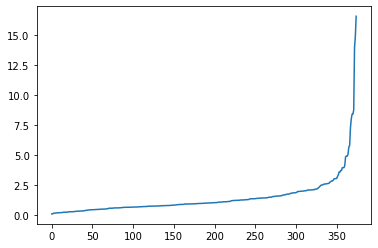

In [164]:
neigh = NearestNeighbors(n_neighbors=4, metric='euclidean' )
nbrs = neigh.fit(df_sizediff)
distances, indices = nbrs.kneighbors(df_sizediff)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Euclidian metric with no scaling

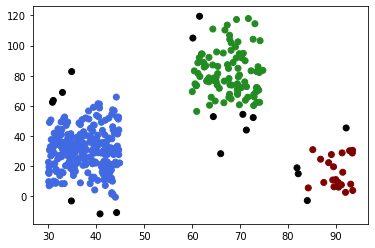

In [492]:
m_sizediff = DBSCAN(eps=6.0, min_samples=4)
m_sizediff.fit(df_sizediff)
labels_pred = m_sizediff.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_sizediff["x"], df_sizediff["y"], c=vectorizer(labels_pred))

In [493]:
print('Adjusted Rand score:',metrics.adjusted_rand_score(labels_size, labels_pred))
print('Silhouette score:',metrics.silhouette_score(df_sizediff, labels_pred, metric='euclidean'))
print('Homogenityscore:',metrics.homogeneity_score(labels_size, labels_pred))

Adjusted Rand score: 0.9276081280145378
Silhouette score: 0.5977271000852485
Homogenityscore: 0.9361353966757422


### Eiclidian metric with scaled data

In [0]:
scaler = MinMaxScaler()
scaler.fit(df_sizediff)
tmp = scaler.transform(df_sizediff)
df_rescalled = DataFrame(tmp, columns=['x','y'])

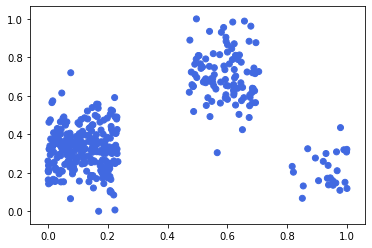

In [343]:
m_rescalled = DBSCAN(eps=6.0, min_samples=4)
m_rescalled.fit(df_rescalled)
labels_pred = m_rescalled.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_rescalled["x"], df_rescalled["y"], c=vectorizer(labels_pred))

In [335]:
metrics.homogeneity_score(labels_size, labels_pred)

-3.8006428467029645e-16

### Hamming metric with no scaling

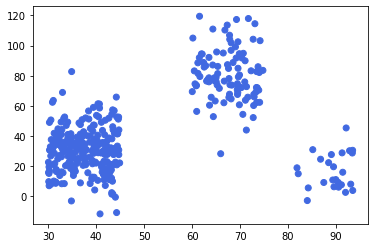

In [344]:
m_sizediff = DBSCAN(eps=6.0, min_samples=4, metric='hamming')
m_sizediff.fit(df_sizediff)
clusters = m_sizediff.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_sizediff["x"], df_sizediff["y"], c=vectorizer(clusters))

### Correlation metric with no scaling

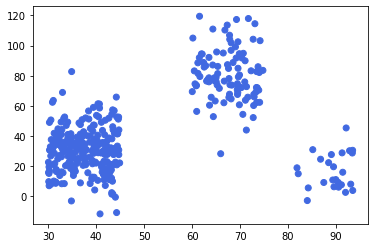

In [345]:
m_sizediff = DBSCAN(eps=6.0, min_samples=4, metric='correlation')
m_sizediff.fit(df_sizediff)
clusters = m_sizediff.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_sizediff["x"], df_sizediff["y"], c=vectorizer(clusters))

## 5. Different Cluster Densities

### Determine best eps for min_samples=4

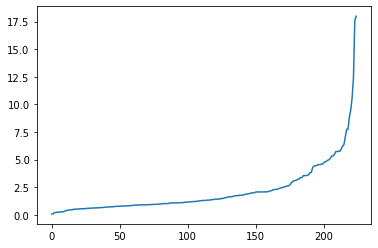

In [183]:
neigh = NearestNeighbors(n_neighbors=4, metric='euclidean' )
nbrs = neigh.fit(df_densediff)
distances, indices = nbrs.kneighbors(df_densediff)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Euclidian metric with no scaling

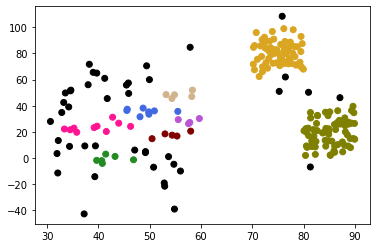

In [494]:
m_densediff = DBSCAN(eps=5.0, min_samples=4)
m_densediff.fit(df_densediff)
labels_pred = m_densediff.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_densediff["x"], df_densediff["y"], c=vectorizer(labels_pred))

In [495]:
print('Adjusted Rand score:',metrics.adjusted_rand_score(labels_dense, labels_pred))
print('Silhouette score:',metrics.silhouette_score(df_densediff, labels_pred, metric='euclidean'))
print('Homogenityscore:',metrics.homogeneity_score(labels_dense, labels_pred))

Adjusted Rand score: 0.7445331768073855
Silhouette score: 0.3974144616034212
Homogenityscore: 0.91287607426967


### Eiclidian metric with scaled data

In [0]:
scaler = MinMaxScaler()
scaler.fit(df_densediff)
tmp = scaler.transform(df_densediff)
df_rescalled = DataFrame(tmp, columns=['x','y'])

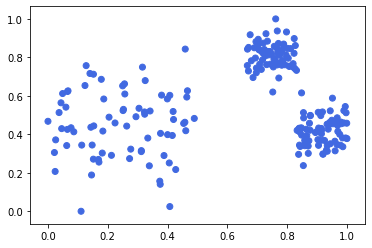

In [309]:
m_rescalled = DBSCAN(eps=5.0, min_samples=4)
m_rescalled.fit(df_rescalled)
labels_pred = m_rescalled.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_rescalled["x"], df_rescalled["y"], c=vectorizer(labels_pred))

In [310]:
metrics.homogeneity_score(labels_dense, labels_pred)

-9.095116925862994e-16

### Hamming metric with no scaling

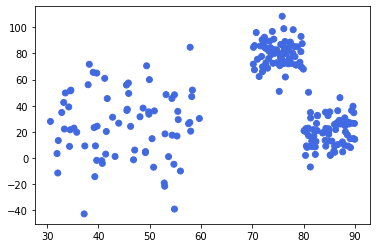

In [312]:
m_densediff = DBSCAN(eps=5.0, min_samples=4, metric='hamming')
m_densediff.fit(df_densediff)
clusters = m_densediff.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_densediff["x"], df_densediff["y"], c=vectorizer(clusters))

### Correlation metric with no scaling

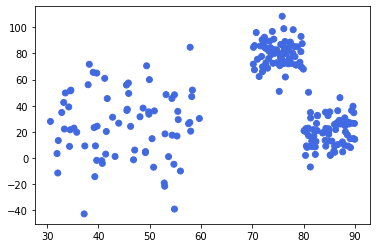

In [313]:
m_densediff = DBSCAN(eps=5.0, min_samples=4, metric='correlation')
m_densediff.fit(df_densediff)
clusters = m_densediff.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_densediff["x"], df_densediff["y"], c=vectorizer(clusters))

## 6. New dataset

### Determine best eps for min_samples=4

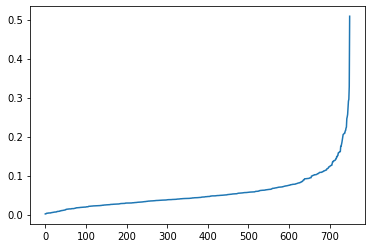

In [190]:
neigh = NearestNeighbors(n_neighbors=4, metric='euclidean' )
nbrs = neigh.fit(df_new)
distances, indices = nbrs.kneighbors(df_new)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Euclidian metric with no scaling

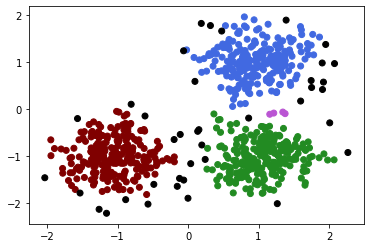

In [496]:
m_new = DBSCAN(eps=0.2, min_samples=4)
m_new.fit(df_new)
labels_pred = m_new.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_new["x"], df_new["y"], c=vectorizer(labels_pred))

In [497]:
print('Adjusted Rand score:',metrics.adjusted_rand_score(labels_new, labels_pred))
print('Silhouette score:',metrics.silhouette_score(df_new, labels_pred, metric='euclidean'))
print('Homogenityscore:',metrics.homogeneity_score(labels_new, labels_pred))

Adjusted Rand score: 0.9081657907573328
Silhouette score: 0.42734244338809807
Homogenityscore: 0.937726319661419


### Eiclidian metric with scaled data

In [0]:
scaler = MinMaxScaler()
scaler.fit(df_new)
tmp = scaler.transform(df_new)
df_rescalled = DataFrame(tmp, columns=['x','y'])

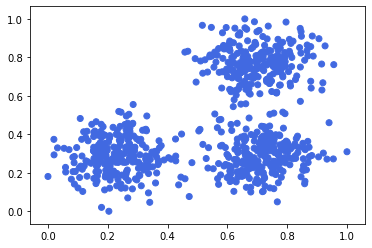

In [499]:
m_rescalled = DBSCAN(eps=0.2, min_samples=4)
m_rescalled.fit(df_rescalled)
labels_pred = m_rescalled.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_rescalled["x"], df_rescalled["y"], c=vectorizer(labels_pred))

In [0]:
metrics.homogeneity_score(labels_size, labels_pred)

-3.8006428467029645e-16

### Hamming metric with no scaling

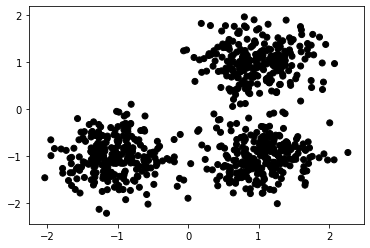

In [315]:
m_new = DBSCAN(eps=0.2, min_samples=4, metric='hamming')
m_new.fit(df_new)
clusters = m_new.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_new["x"], df_new["y"], c=vectorizer(clusters))

### Correlation metric with no scaling

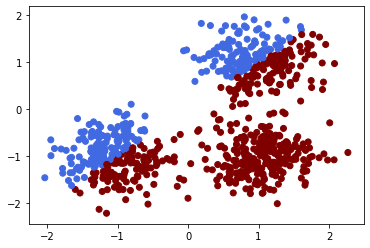

In [316]:
m_new = DBSCAN(eps=0.2, min_samples=4, metric='correlation')
m_new.fit(df_new)
clusters = m_new.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'red', 'blue', 'green', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(df_new["x"], df_new["y"], c=vectorizer(clusters))

# Real world Heart Dataset


In [346]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [388]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML/assignment_week8/input/heart.csv")
df

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      1   1     2       0

[303 rows x 14 columns]

In [0]:
true_labels = df['target']

## PCA to reduce to two dimensions

In [390]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

P1         P2
0  -12.267726   2.870002
1    2.689662 -39.873863
2  -42.950640 -23.639530
3  -10.945206 -28.441101
4  106.978583 -15.879436

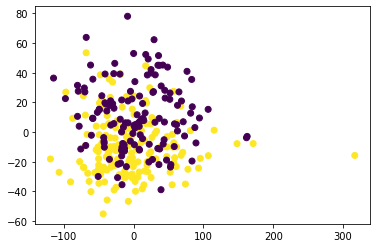

In [391]:
plt.scatter(X_principal['P1'], X_principal['P2'], c=true_labels)

In [392]:
neigh = NearestNeighbors(n_neighbors=4, metric='euclidean')
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)
#print(distances, indices)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Euclidian metric with no scaling

In [504]:
db_default = DBSCAN(eps = 17, min_samples = 4)
db_default.fit(df) 
labels_pred = db_default.labels_ 
colors = ['royalblue', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X_principal['P1'], X_principal['P2'], c=vectorizer(clusters))
metrics.accuracy_score(true_labels, labels_pred)

0.24092409240924093

In [506]:
print('Adjusted Rand score:',metrics.adjusted_rand_score(true_labels, labels_pred))
print('Silhouette score:',metrics.silhouette_score(df, labels_pred, metric='euclidean'))

Adjusted Rand score: 0.04404273616259867
Silhouette score: -0.20485172893853956


### Eiclidian metric with scaled data

In [0]:
scaler = MinMaxScaler()
scaler.fit(df)
tmp = scaler.transform(df)
df_rescalled = DataFrame(tmp)

In [436]:
m_rescalled = DBSCAN(eps=17, min_samples=4)
m_rescalled.fit(df_rescalled)
labels_pred = m_rescalled.labels_
colors = ['royalblue', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X_principal['P1'], X_principal['P2'], c=vectorizer(clusters))
metrics.accuracy_score(true_labels, clusters)

0.24092409240924093

In [0]:
%matplotlib inline

# SELF ORGANIZING MAPS


In [525]:

!pip install minisom
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import math
import pandas as pd
from sklearn.datasets import make_blobs
import seaborn as sns


In [0]:
X_three,y_three = make_blobs(centers=3,n_features=3, n_samples=300, random_state=0, cluster_std=0.4)
X_four,y_four = make_blobs(centers=3,n_features=4, n_samples=300, random_state=0, cluster_std=0.4)
X_five,y_five = make_blobs(centers=3,n_features=5, n_samples=300, random_state=0, cluster_std=0.4)


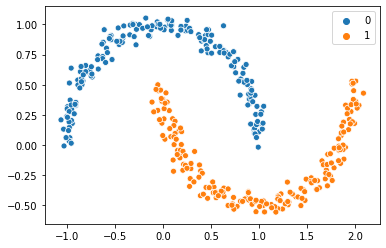

In [509]:
from sklearn.datasets import make_moons
X_MOON, labels_MOON = make_moons(375, noise=.05, random_state=0)
#Perfect Labeling
ax = sns.scatterplot(x=X_MOON[:,0], y=X_MOON[:,1], hue=labels_MOON)


In [0]:
X_close = X_MOON
y_close = labels_MOON
total_datapoints = len(X_close)
twod_optimal = round(math.sqrt(math.sqrt(total_datapoints)*2))

total_datapoints = 300
optimal_squared = round(math.sqrt(math.sqrt(total_datapoints)*2))

In [0]:
som_2 = MiniSom(twod_optimal, twod_optimal, 2, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som_3 = MiniSom(optimal_squared, optimal_squared, 3, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som_4 = MiniSom(optimal_squared, optimal_squared, 4, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som_5 = MiniSom(optimal_squared, optimal_squared, 5, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)

In [512]:
som_3.pca_weights_init(X_three)
print("Training...")
som_3.train_batch(X_three, 1000, verbose=True)  # random training
print("\n...ready!")

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.3352573132925902
 topographic error: 0.95

...ready!


In [513]:
som_4.pca_weights_init(X_four)
print("Training...")
som_4.train_batch(X_four, 1000, verbose=True)  # random training
print("\n...ready!")

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.4573770397479986
 topographic error: 0.7233333333333334

...ready!


In [514]:
som_5.pca_weights_init(X_five)
print("Training...")
som_5.train_batch(X_five, 1000, verbose=True)  # random training
print("\n...ready!")

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5488278230269353
 topographic error: 0.87

...ready!


In [515]:
som_2.pca_weights_init(X_close)
print("Training...")
som_2.train_batch(X_close, 1000, verbose=True)  # random training
print("\n...ready!")


Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.0827468683662292
 topographic error: 0.6266666666666667

...ready!


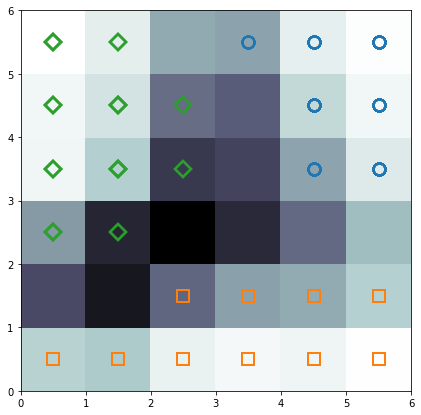

In [516]:
plt.figure(figsize=(7, 7))
plt.pcolor(som_3.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = y_three
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X_three):
    w = som_3.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5 , markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.show()

In [517]:
plt.figure(figsize=(7, 7))
plt.pcolor(som_4.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = y_four
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X_four):
    w = som_4.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5 , markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.show()

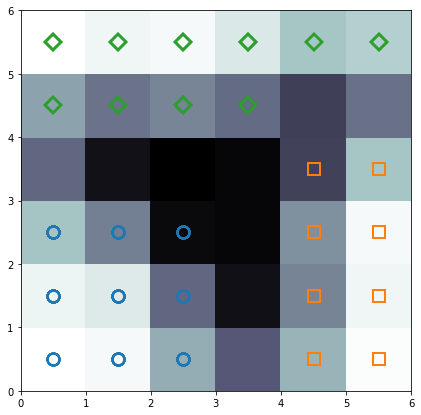

In [518]:
plt.figure(figsize=(7, 7))
plt.pcolor(som_5.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = y_five
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X_five):
    w = som_5.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5 , markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.show()

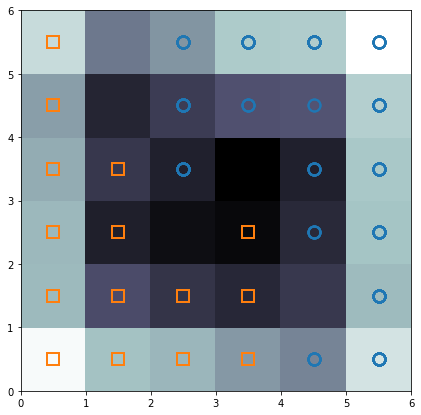

In [519]:
plt.figure(figsize=(7, 7))
plt.pcolor(som_2.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = y_close

colors = []
for i in range(0,30):
  color = 'C' + str(i)
  colors.append(color)


t = y_close
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(X_close):
    w = som_2.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5 , markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)

plt.show()

In [0]:
def classify(som, data, class_assignments):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = class_assignments
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [0]:
cluster_assignments = som_3.labels_map(X_three,y_three)
target_cluster = classify(som_3,X_three,cluster_assignments)

In [0]:
from sklearn.metrics import classification_report

In [528]:
print(classification_report(y_three, target_cluster))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [0]:
cluster_assignments = som_4.labels_map(X_four,y_four)
target_cluster = classify(som_4,X_four,cluster_assignments)


In [530]:
print(classification_report(y_four, target_cluster))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [0]:
cluster_assignments = som_5.labels_map(X_five,y_five)
target_cluster = classify(som_5,X_five,cluster_assignments)

In [532]:
print(classification_report(y_five, target_cluster))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [0]:
cluster_assignments = som_3.labels_map(X_three,y_three)
winmap = cluster_assignments
default_class = np.sum(list(winmap.values())).most_common()[0][0]

In [534]:
cluster_assignments = som_2.labels_map(X_close,y_close)
target_cluster = classify(som_2,X_close,cluster_assignments)
print(classification_report(y_close, target_cluster))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       188

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



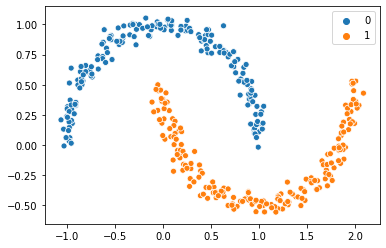

In [535]:
ax = sns.scatterplot(x=X_close[:,0], y=X_close[:,1], hue=target_cluster)

# Different Topologies

In [536]:
X_close = X_MOON
y_close = labels_MOON

total_datapoints = len(X_close)
squared = round(math.sqrt(total_datapoints))
twod_optimal = round(math.sqrt(math.sqrt(total_datapoints)*2))
print(twod_optimal)
print(squared)

6
19


In [0]:

som_2_rect2 = MiniSom(3, 12, 2, sigma=1, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
#Overfit
som_2_overfit = MiniSom(squared, squared, 2, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som_2_rectover  = MiniSom(2, 36, 2, sigma=1, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
#Underfit
som_2_underfit = MiniSom(4, 4, 2, sigma=1, learning_rate=0.5, 
    
              neighborhood_function='triangle', random_seed=10)

In [538]:
cluster_assignments = som_2_rect2.labels_map(X_close,y_close)
target_cluster = classify(som_2_rect2,X_close,cluster_assignments)
print(classification_report(y_close, target_cluster))
ax = sns.scatterplot(x=X_close[:,0], y=X_close[:,1], hue=target_cluster)



              precision    recall  f1-score   support

           0       0.83      0.93      0.88       187
           1       0.92      0.81      0.86       188

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [539]:
plt.figure(figsize=(7, 7))
plt.pcolor(som_2_rect2.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = y_close

colors = []
for i in range(0,30):
  color = 'C' + str(i)
  colors.append(color)


t = y_close
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(X_close):
    w = som_2_rect2.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5 , markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)

plt.show()

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       187
           1       0.89      0.89      0.89       188

    accuracy                           0.89       375
   macro avg       0.89      0.89      0.89       375
weighted avg       0.89      0.89      0.89       375



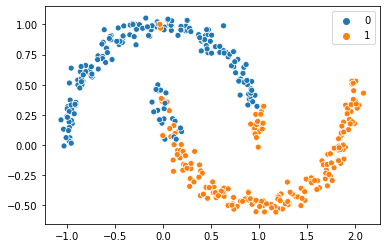

In [540]:

cluster_assignments = som_2_overfit.labels_map(X_close,y_close)
target_cluster = classify(som_2_overfit,X_close,cluster_assignments)
print(classification_report(y_close, target_cluster))
ax = sns.scatterplot(x=X_close[:,0], y=X_close[:,1], hue=target_cluster)


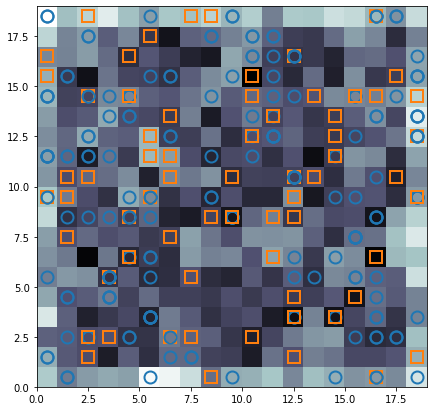

In [541]:
plt.figure(figsize=(7, 7))
plt.pcolor(som_2_overfit.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = y_close
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(X_close):
    w = som_2_overfit.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5 , markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)

plt.show()

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       187
           1       0.91      0.82      0.86       188

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



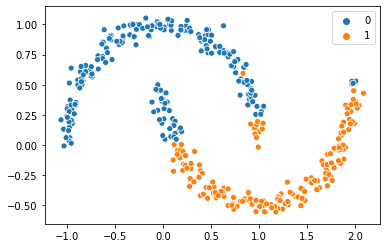

In [542]:
cluster_assignments = som_2_rectover.labels_map(X_close,y_close)
target_cluster = classify(som_2_rectover,X_close,cluster_assignments)
print(classification_report(y_close, target_cluster))
ax = sns.scatterplot(x=X_close[:,0], y=X_close[:,1], hue=target_cluster)

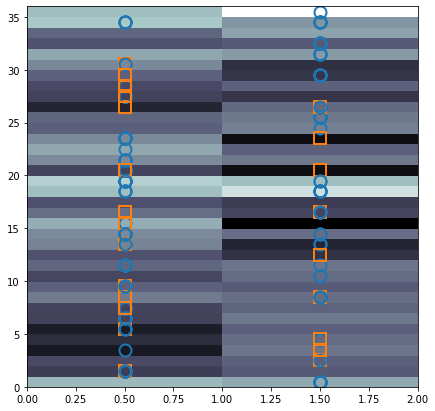

In [543]:
plt.figure(figsize=(7, 7))
plt.pcolor(som_2_rectover.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = y_close
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(X_close):
    w = som_2_rectover.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5 , markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)

plt.show()

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       187
           1       0.92      0.81      0.86       188

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



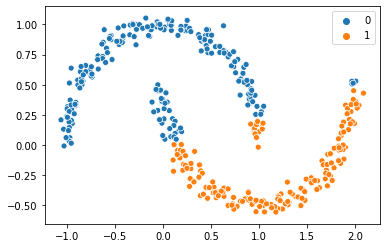

In [544]:

cluster_assignments = som_2_underfit.labels_map(X_close,y_close)
target_cluster = classify(som_2_underfit,X_close,cluster_assignments)
print(classification_report(y_close, target_cluster))

ax = sns.scatterplot(x=X_close[:,0], y=X_close[:,1], hue=target_cluster)

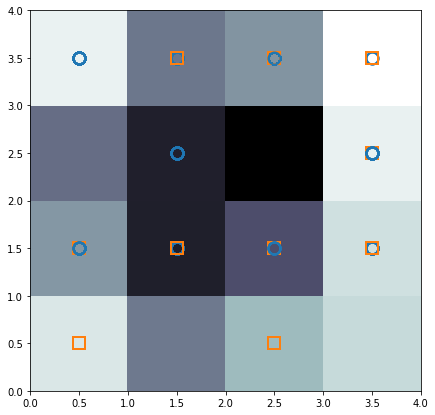

In [557]:
plt.figure(figsize=(7, 7))
plt.pcolor(som_2_underfit.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = y_close
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(X_close):
    w = som_2_underfit.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5 , markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)

plt.show()

#Real World Classification Set

In [0]:
data_heart = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML/assignment_week8/input/heart.csv")

In [549]:
data_heart.head()


age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [550]:
target_y = data_heart["target"]
data_heart = data_heart.drop("target",axis=1)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_heart)
data_heart_transformed = pd.DataFrame(scaler.transform(data_heart))
data_heart_transformed.head()

0    1         2         3   ...        9    10   11        12
0  0.708333  1.0  1.000000  0.481132  ...  0.370968  0.0  0.0  0.333333
1  0.166667  1.0  0.666667  0.339623  ...  0.564516  0.0  0.0  0.666667
2  0.250000  0.0  0.333333  0.339623  ...  0.225806  1.0  0.0  0.666667
3  0.562500  1.0  0.333333  0.245283  ...  0.129032  1.0  0.0  0.666667
4  0.583333  0.0  0.000000  0.245283  ...  0.096774  1.0  0.0  0.666667

[5 rows x 13 columns]

In [551]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_heart_transformed, target_y, test_size=0.33, random_state=42)
X_train.head()

0    1         2         3   ...        9    10    11        12
37   0.520833  1.0  0.666667  0.528302  ...  0.258065  1.0  0.00  1.000000
16   0.604167  0.0  0.666667  0.245283  ...  0.000000  1.0  0.00  0.666667
126  0.375000  1.0  0.000000  0.169811  ...  0.016129  1.0  0.00  0.666667
291  0.604167  1.0  0.000000  0.188679  ...  0.709677  0.0  0.75  0.333333
273  0.604167  1.0  0.000000  0.056604  ...  0.016129  1.0  0.25  1.000000

[5 rows x 13 columns]

In [0]:
optimal_squared = round(math.sqrt(math.sqrt(len(X_train))*2))

In [553]:
som_2 = MiniSom(optimal_squared, optimal_squared, 13, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som_2.pca_weights_init(X_train.to_numpy())
print("Training...")
som_2.train_batch(X_train.to_numpy(), 1000, verbose=True)  # random training
print("\n...ready!")

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5152107109916716
 topographic error: 0.4039408866995074

...ready!


In [554]:
cluster_assignments = som_2.labels_map(X_train.to_numpy(),y_train.to_numpy())
target_cluster = classify(som_2,X_test.to_numpy(),cluster_assignments)
print(classification_report(y_test.to_numpy(), target_cluster))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72        42
           1       0.83      0.67      0.74        58

    accuracy                           0.73       100
   macro avg       0.74      0.74      0.73       100
weighted avg       0.75      0.73      0.73       100



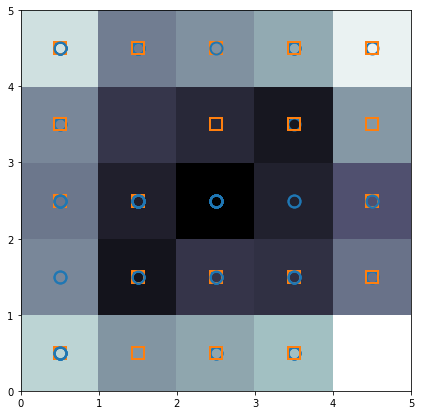

In [556]:
plt.figure(figsize=(7, 7))
plt.pcolor(som_2.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = y_train.to_numpy()
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(X_train.to_numpy()):
    w = som_2.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5 , markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)

plt.show()